In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, silhouette_score
import plotly.express as px
from google.colab import files

In [2]:
df = pd.read_csv('/content/improved_employee_performance_data.csv')

In [3]:
df.drop_duplicates(inplace=True)

In [4]:
num_cols = df.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

In [5]:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]


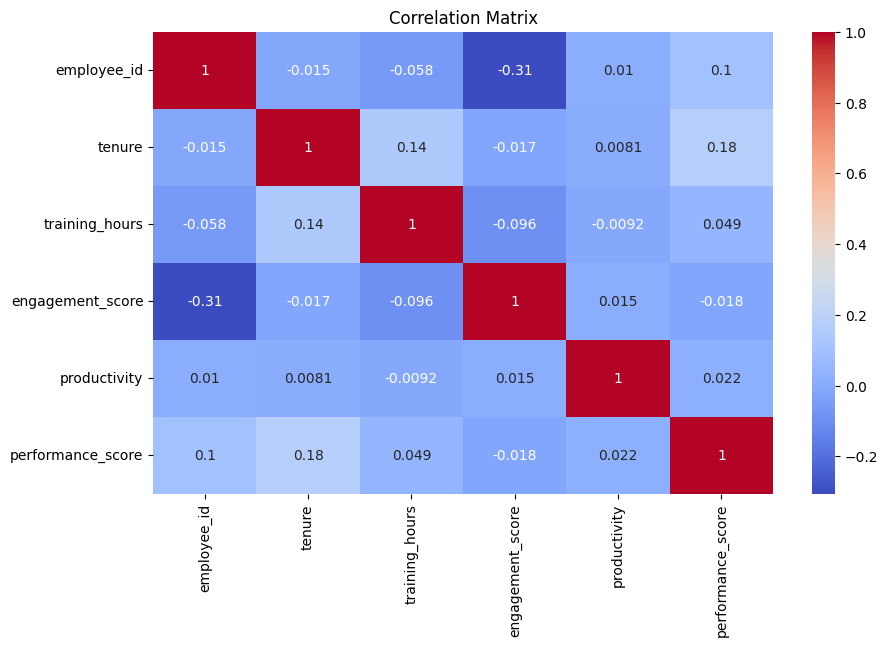

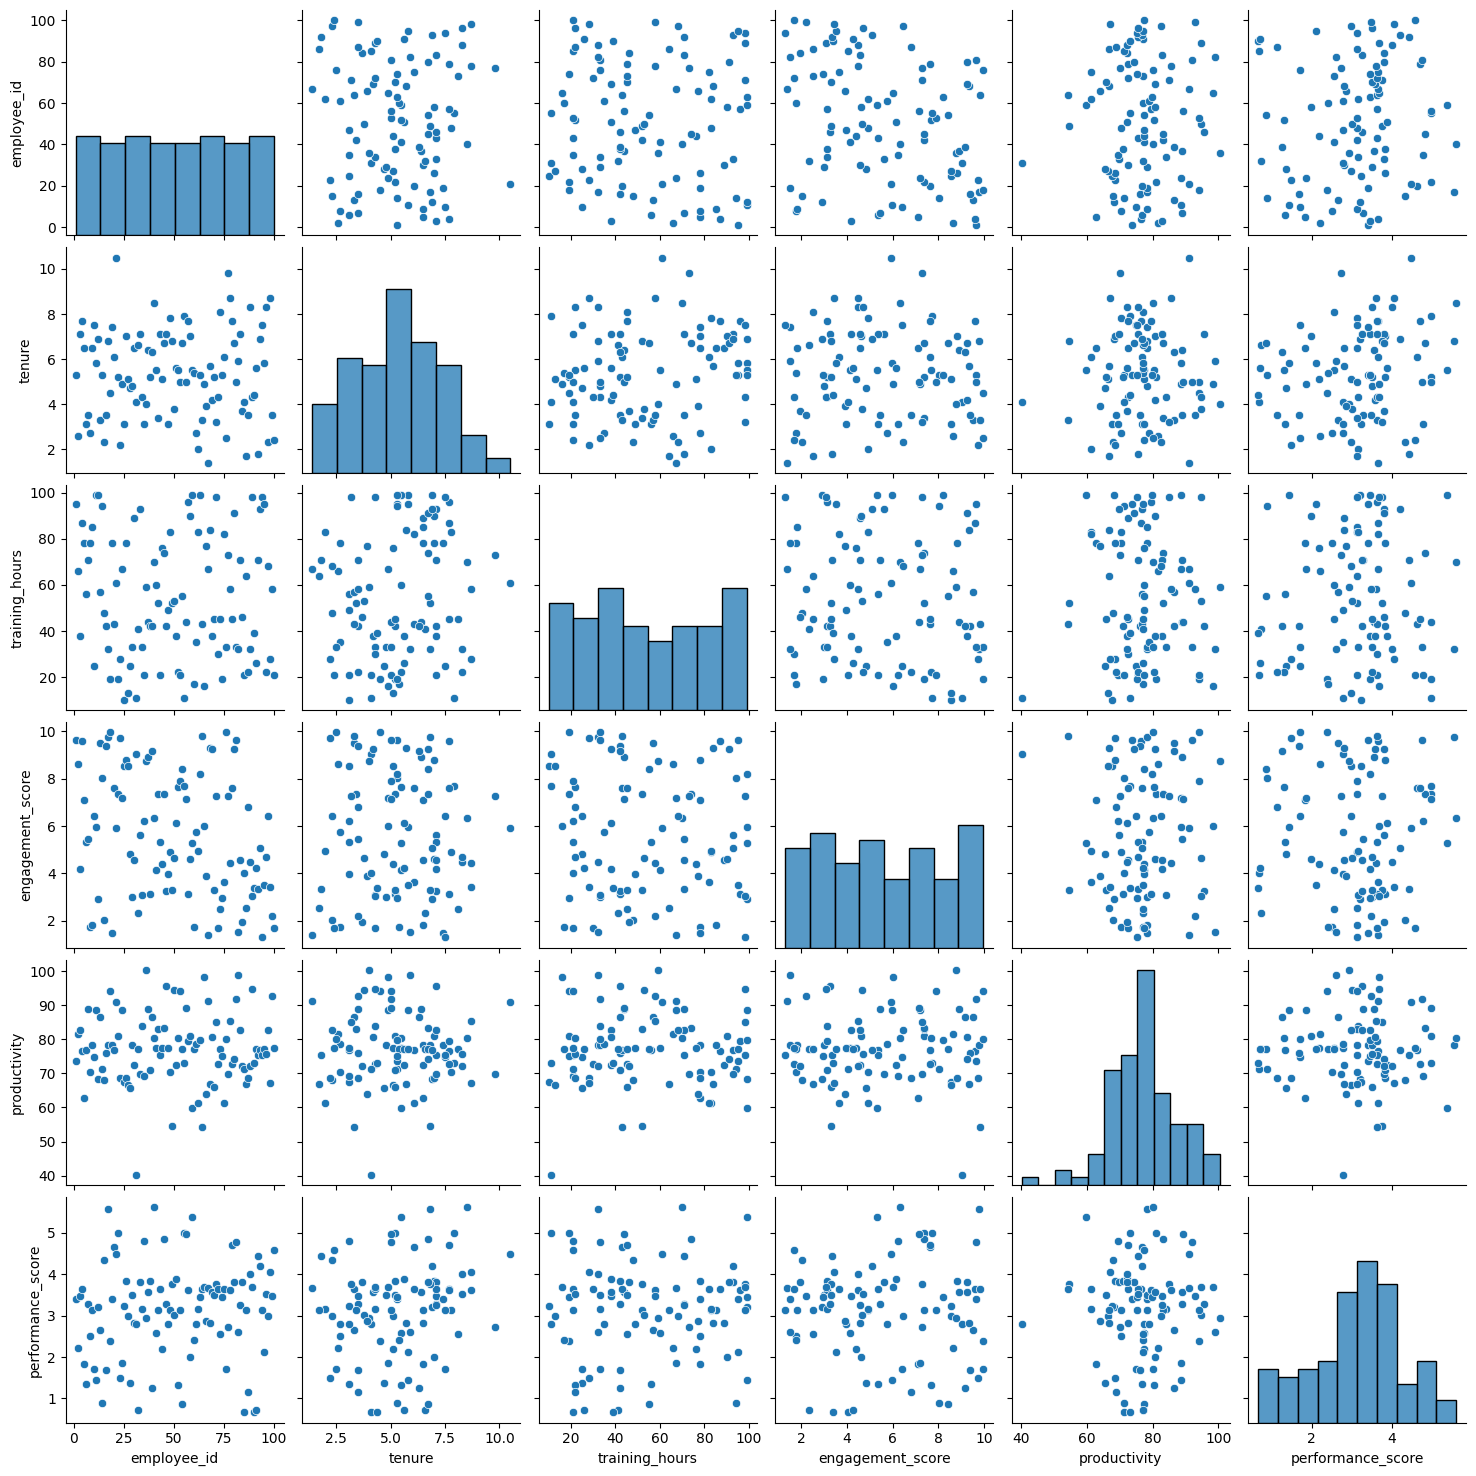

In [10]:
num_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(df[num_cols])
plt.show()


In [11]:
df['avg_productivity_dept'] = df.groupby('department')['productivity'].transform('mean')

scaler = MinMaxScaler()
df['normalized_engagement'] = scaler.fit_transform(df[['engagement_score']])

In [12]:
X = df[['tenure', 'training_hours', 'normalized_engagement']]
y = df['performance_score']

reg_model = LinearRegression()
reg_model.fit(X, y)
y_pred = reg_model.predict(X)

In [14]:
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 0.03


In [15]:
features = df[['performance_score', 'normalized_engagement']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

sil_score = silhouette_score(features, df['cluster'])
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.41


In [16]:
fig = px.scatter(df, x='performance_score', y='normalized_engagement',
                 color='cluster', title='Employee Clusters by Performance & Engagement')
fig.show()

fig = px.bar(df.groupby('department')['avg_productivity_dept'].mean().reset_index(),
             x='department', y='avg_productivity_dept',
             title='Average Productivity by Department')
fig.show()